## Plot_climatology.ipynb

Plot the climatology for different models; paritulcalry here comaing HadGEM3 and IPSL which show divergent behaviour from the TM90 blocking trends; see if there is divergent behaviour in the sea level pressure or im the TM90 climatologies.

Also here we derive the data shown in the accompanying table for the recall, precision and F1 scores



In [1]:
import xarray
import xarray as xr
from itertools import groupby
import matplotlib.pyplot as plt
import glob
import numpy as np
import scipy
from scipy import stats
import cartopy.crs as ccrs
#import skill_metrics as sm #Taylor diagrams
from sklearn.metrics import mean_squared_error

## Plot climatologies for the indices for paper

In [3]:

def calc_pr_rc_F1(GTD, block_occ):
    """
    Calculate skill scores from input DataArrays
    """
    true_pos = ((GTD + block_occ.values)==2).sum()
    false_pos = sum([1 if BI_val==1 and GTD[i]==0 else 0 for i, BI_val in enumerate(block_occ.values)])
    precision = float(true_pos/(true_pos+false_pos))
    recall = float(true_pos/(GTD.sum()))
    if precision == 0:
        F1 = 0
    else:
        F1 = float(2 * (precision * recall) / (precision + recall))
    
    return precision, recall, F1

In [13]:

AGP_ERA5 = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_era5_reanal_EUR_JJAextd_1979-2019.nc")['TM90_clusters'][:,:-1,:]>0
AGPsel_ERA5 = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_era5_reanal_EUR_JJAextd_1979-2019.nc")['TM90_clusters'][:,10:,:]>0
DG83_ERA5 = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/DG83/block_data/DG83_clusters_fin_era5_reanal_EUR_JJAextd_1979-2019.nc")['TM90_clusters']>0
S04_ERA5 = xr.open_dataset(f"/rds/general/user/cmt3718/home/data/reanal/S04/block_data/S04_clusters_fin_era5_reanal_EUR_JJAextd_1979-2019.nc")['TM90_clusters'][:,:-1,:]>0

AGP_UK = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060.nc")['TM90_clusters']>0

AGPsel_UK = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060.nc")['TM90_clusters'][:,5:,:]>0
#("/rds/general/user/cmt3718/home/data/UKESM1-0-LL_piControl/AGP/AGP_clusters_fin_UKESM1-0-LL_r1i1p1f2_EUR_piControl_JJAextd_1960-2060.nc")['TM90_clusters'][:,:,:]>0
DG83_UK = xr.open_dataset("/rds/general/user/cmt3718/home/data/UKESM1-0-LL_piControl/DG83/DG83_clusters_fin_UKESM1-0-LL_r1i1p1f2_EUR_piControl_JJAextd_1960-2060.nc")['TM90_clusters']>0
DG83_UK = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/DG83/DG83_clusters_fin_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060.nc")['TM90_clusters']>0

#S04_occ, DG83_occ, AGP_occ = (S04.sum(axis=1).sum(axis=1)>0)+1-1, (DG83.sum(axis=1).sum(axis=1)>0)+1-1, (AGP.sum(axis=1).sum(axis=1)>0)+1-1

In [5]:
def occ_JJA(da):
    da_JJA = da.sel(time = np.isin(da['time.season'], "JJA"))
    da_JJA_occ = ((da_JJA.sum(axis=1).sum(axis=1)>0)+1-1)
    return da_JJA_occ


AGPE, DG83E, S04E, AGPU, AGPE_UK, DG83U = occ_JJA(AGP_ERA5), occ_JJA(DG83_ERA5), occ_JJA(S04_ERA5), occ_JJA(AGP_UK), occ_JJA(AGPE_UK), occ_JJA(DG83_UK)


In [15]:
AGPselE, AGPselU = occ_JJA(AGPsel_ERA5), occ_JJA(AGPsel_UK)

In [16]:
##compare occurrence to GTD for ERA5 and UKESM
#tabulate the rate of occurence, precision, recall and F1 scores for each of the indices
GTDUK = xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/GTD_UKESM1-0-LL/GTD_UKESM1-0-LL_piControl_1960-2060_JJAextd.nc")['blocking']
GTDU = GTDUK.sel(time = np.isin(GTDUK['time.season'], "JJA"))
GTDERA5 = xr.open_dataset("/rds/general/project/nowack_graven/live/carl_som_index/data/GTD_1979-2019_JJAextd.nc")['blocking']
GTDE = GTDERA5.sel(time = np.isin(GTDERA5['time.season'], "JJA"))

#GTDE.mean(), AGPE.mean(), DG83E.mean(), S04E.mean(), GTDU.mean(), AGPU.mean(), DG83U.mean()

In [20]:
#calc_pr_rc_F1(GTDE, AGPselE)
calc_pr_rc_F1(AGPE, AGPselE),calc_pr_rc_F1(DG83E, AGPselE),calc_pr_rc_F1(S04E, AGPselE)
              #AGPsampU), calc_pr_rc_F1(GTDU, AGPU), calc_pr_rc_F1(GTDU_wronglonJJA, AGPsampU), calc_pr_rc_F1(GTDU_wronglonJJA, AGPU)
#AGPU, DG83U

((1.0, 0.5604217356042174, 0.7182952182952184),
 (0.5890014471780028, 0.6276021588280648, 0.6076894363568496),
 (0.08755426917510854, 0.6019900497512438, 0.1528742893240682))

In [34]:
AGPselU.mean()

<xarray.DataArray 'TM90_clusters' ()>
array(0.169637)

In [31]:
calc_pr_rc_F1(blo_ERA5_JJA, AGPE[92:])

(0.4139515455304929, 0.7688130333591932, 0.5381482487102905)

In [33]:
calc_pr_rc_F1(GTDU, AGPselU), calc_pr_rc_F1(AGPU, AGPselU), calc_pr_rc_F1(DG83U, AGPselU), calc_pr_rc_F1(blo_UK_JJA, AGPselU[:len(blo_UK_JJA)])

((0.41374837872892345, 0.24194160030337505, 0.3053362048336923),
 (1.0, 0.5530846484935438, 0.7122401847575057),
 (0.2704280155642023, 0.3154311649016641, 0.29120111731843573),
 (0.3510150622134905, 0.20112570356472795, 0.25572519083969464))

In [9]:
calc_pr_rc_F1(GTDU, AGPU)

(0.2747489239598278, 0.29048160788775124, 0.2823963133640553)

In [12]:
AGPsamp=xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060.nc")['TM90_clusters']

In [13]:
AGPsampU = occ_JJA(AGPsamp)

In [102]:
AGPsamp = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_UKESM1-0-LL_r1i1p1f2_piControl_EUR_UKESM1-0-LL_JJAextd.nc")['TM90_clusters']
AGPsamp_p = xr.open_dataset("/rds/general/user/cmt3718/home/data/reanal/AGP/AGP_clusters_fin_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060_not2011_2039.nc")['TM90_clusters'][:4900,:,:]>0



In [97]:
AGP=xr.open_dataset('/rds/general/user/cmt3718/home/data/AGP/AGP_UKESM1-0-LL_r1i1p1f2_piControl_EUR_JJAextd_1960-2060.nc')['AGP']

In [52]:
GTDU_wronglon=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/GTD_UKESM1-0-LL/GTD_UKESM1-0-LL_piControl_1960-2060_JJAextd_wronglon.nc")['blocked']

In [55]:
GTDU_wronglonJJA=GTDU_wronglon.sel(time=np.isin(GTDU_wronglon['time.season'], "JJA"))

In [11]:

BLOU = xr.DataArray(np.ones((len(GTDU))))
calc_pr_rc_F1(GTDU, BLOU)#, calc_pr_rc_F1(GTDU_wronglonJJA, BLOU)

(0.2900990099009901, 1.0, 0.4497313891020721)

In [13]:
calc_pr_rc_F1(DG83U, AGPU)

(0.16965566714490674, 0.3577912254160363, 0.23017031630170315)

In [116]:
calc_pr_rc_F1(GTDU, AGPsampU), calc_pr_rc_F1(GTDU, AGPU), calc_pr_rc_F1(GTDU_wronglonJJA, AGPsampU), calc_pr_rc_F1(GTDU_wronglonJJA, AGPU)
#AGPU, DG83U

((0.2747489239598278, 0.29048160788775124, 0.2823963133640553),
 (0.40707497360084477, 0.2923777019340159, 0.34032222467446477),
 (0.3547345767575323, 0.34959349593495936, 0.3521452732775503),
 (0.32840549102428723, 0.21986567691763875, 0.26339191192038963))

In [118]:
calc_pr_rc_F1(DG83U, AGPU)

(0.23125659978880675, 0.22278738555442523, 0.22694300518134713)

In [90]:
calc_pr_rc_F1(GTDU_wronglonJJA[:4500], AGPsampU), calc_pr_rc_F1(GTDU_wronglonJJA, AGPU)

((0.45484508899143045, 0.3859060402684564, 0.4175491679273828),
 (0.32840549102428723, 0.21986567691763875, 0.26339191192038963))

In [18]:
calc_pr_rc_F1(GTDU[:9000], blo_UK_JJA)

(0.7046904315196998, 0.7170675830469645, 0.7108251324753974)

In [66]:
calc_pr_rc_F1(GTDU_wronglonJJA, DG83U)

(0.7548321464903357, 0.5245669848002827, 0.6189781021897809)

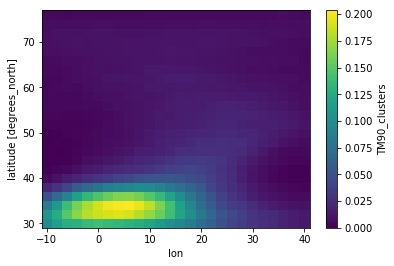

In [81]:
AGPsamp.mean(axis=0).plot()

In [12]:
AGP_mask = AGP_ERA5.sel(latitude = np.arange(40,76))

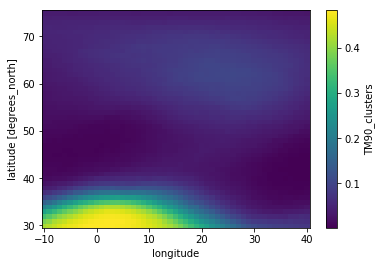

In [11]:
AGP_ERA5.mean(axis=0).plot()

In [13]:
AGP_ME = occ_JJA(AGP_mask)

In [24]:
calc_pr_rc_F1(GTDU, AGPU)

(0.2747489239598278, 0.29048160788775124, 0.2823963133640553)

In [20]:
calc_pr_rc_F1(blo_UK_JJA, DG83U[:9000])

(0.8315548780487805, 0.40938086303939963, 0.5486547648981644)

In [21]:
ERA5_files=sorted(glob.glob(f'/rds/general/project/nowack_graven/live/carl_som_index/data/z/crossval/F1_cv/10-fold/training_yrs/*blocked_clusters*'))
UK_files=sorted(glob.glob(f'/rds/general/project/nowack_graven/live/carl_som_index/data/zg/crossval/F1_cv/10-fold/training_yrs/*blocked_clusters*'))

In [22]:
ERA5_files=sorted(glob.glob(f'/rds/general/project/nowack_graven/live/carl_som_index/data/z/crossval/F1_cv/10-fold/training_yrs/*blocked_clusters*'))
#combine the above files to create the cross-validated test aataset
blo_comb_ERA5 = []
for file in ERA5_files:
    da=xr.open_dataset(file)['blocking']
    blo_comb_ERA5.append(da)
blo_ERA5 = xr.concat(blo_comb_ERA5, dim="time")
blo_ERA5_JJA = blo_ERA5.sel(time = np.isin(blo_ERA5['time.season'], "JJA"))


blo_ERA5_JJA

#.mean()
#compare cv dataset to the BIs and GTD to calculate F1 score

<xarray.DataArray 'blocking' (time: 3680)>
array([1., 1., 1., ..., 1., 1., 1.])
Coordinates:
  * time     (time) datetime64[ns] 1980-06-01T10:30:00 ... 2019-08-31T10:30:00

In [23]:
blo_comb_UK = []
for file in UK_files:
    da=xr.open_dataset(file)['blocking']
    blo_comb_UK.append(da)
blo_UK = xr.concat(blo_comb_UK, dim="time")
blo_UK_JJA = blo_UK.sel(time = np.isin(blo_UK['time.season'], "JJA"))


In [11]:
BLO = xr.DataArray(np.ones((len(GTDE))-92))

In [12]:
true_pos = ((GTDE + BLO)==2).sum()
false_pos = sum([1 if BI_val==1 and GTDE[i]==0 else 0 for i, BI_val in enumerate(BLO.values)])
precision = float(true_pos/(true_pos+false_pos))
recall = float(true_pos/(GTDE.sum()))

In [254]:
n = int(GTDE.sum())
m = len(GTDE) - n

RNDE = np.ones(n+m)
RNDE[:m] = 0


RNDE=xr.DataArray(RNDE)

In [260]:
F1AGP, F1DG83, F1S04, prGTD, rcGTD, F1GTD = [], [], [], [], [], []

In [261]:


for i in range(15):
    print(i)
    np.random.shuffle(RNDE)
    pr, rc, F1 = calc_pr_rc_F1(AGPE, RNDE)
    F1AGP.append(F1)
    pr, rc, F1 = calc_pr_rc_F1(DG83E, RNDE)
    F1DG83.append(F1)
    pr, rc, F1 = calc_pr_rc_F1(S04E, RNDE)
    F1S04.append(F1)
    pr, rc, F1 = calc_pr_rc_F1(GTDE, RNDE)
    prGTD.append(pr)
    rcGTD.append(rc)
    F1GTD.append(F1)
    
    
    #AGPE.sel(time=np.isin(AGPE['time.year'], range(1980,2020))), blo_ERA5_JJA)

#calc_pr_rc_F1(S04E, BLO)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [40]:
blo_UK_JJA.mean()

<xarray.DataArray 'blocking' ()>
array(0.296111)

In [44]:
#calc_pr_rc_F1(GTDU.sel(time=np.isin(GTDU['time.year'], range(1960,2060))), blo_UK_JJA)
BLOU = xr.DataArray(np.ones((len(blo_UK_JJA))))
calc_pr_rc_F1(BLOU, blo_UK_JJA)

#calc_pr_rc_F1(GTDU.sel(time=np.isin(GTDU['time.year'], range(1960,2060))), blo_UK_JJA)

NameError: name 'blo_UK_JJA' is not defined

In [19]:
GTDU_sel = GTDU.sel(time = np.isin(GTDU['time.year'], range(1960,2060)))
n = int(GTDU_sel.sum())
m = len(GTDU_sel) - n

RNDU_sel = np.ones(n+m)
RNDU_sel[:m] = 0

RNDU_sel=xr.DataArray(RNDU_sel)

In [20]:
F1SOMBI = []

In [36]:
for i in range(50):
    print(i)
    np.random.shuffle(RNDU_sel)
    pr, rc, F1 = calc_pr_rc_F1(blo_UK_JJA, RNDU_sel)
    F1SOMBI.append(F1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [41]:
np.mean(F1SOMBI)

0.29331508763757064

In [21]:

n = int(GTDU.sum())
m = len(GTDU) - n

RNDU = np.ones(n+m)
RNDU[:m] = 0

RNDU = xr.DataArray(RNDU)

In [22]:
F1AGP, F1DG83, F1S04, prGTD, rcGTD, F1GTD = [], [], [], [], [], []

In [23]:
for i in range(60):
    print(i)
    np.random.shuffle(RNDU)
    pr, rc, F1 = calc_pr_rc_F1(AGPU, RNDU)
    F1AGP.append(F1)
    pr, rc, F1 = calc_pr_rc_F1(DG83U, RNDU)
    F1DG83.append(F1)
    #pr, rc, F1 = calc_pr_rc_F1(GTDU, RNDU)
    #prGTD.append(pr)
    #rcGTD.append(rc)
    #F1GTD.append(F1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [24]:
np.mean(F1AGP), np.mean(F1DG83)##, np.mean(F1S04), np.mean(prGTD), np.mean(rcGTD), np.mean(F1GTD), np.mean(F1SOMBI)

(0.29736405529953913, 0.1923970699671634)

In [264]:
GTDE_sel = GTDE.sel(time = np.isin(GTDE['time.year'], range(1980,2020)))
n = int(GTDE_sel.sum())
m = len(GTDE_sel) - n

RNDE_sel = np.ones(n+m)
RNDE_sel[:m] = 0

RNDE_sel=xr.DataArray(RNDE_sel)

In [265]:
F1SOMBI = []

In [270]:

for i in range(15):
    print(i)
    np.random.shuffle(RNDE_sel)
    pr, rc, F1 = calc_pr_rc_F1(blo_ERA5_JJA, RNDE_sel)
    F1SOMBI.append(F1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [263]:
np.mean(F1AGP), np.mean(F1DG83), np.mean(F1S04), np.mean(prGTD), np.mean(rcGTD), np.mean(F1GTD), np.mean(F1SOMBI)

(0.44131757966344426,
 0.3361774298760601,
 0.09065570025131367,
 0.334870164281929,
 0.334870164281929,
 0.334870164281929)

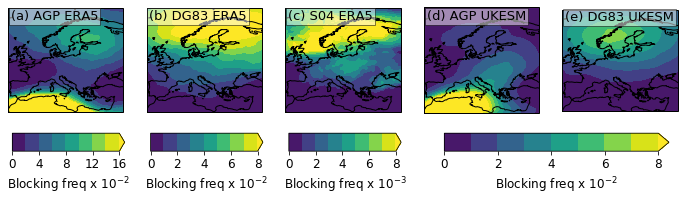

In [22]:

#plot blockign climatology for TM90, DG83 and S04

fig, axs = plt.subplots(ncols=5, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,5))


AGP_ERA5_levs=np.arange(0,0.18,0.02)
DG83_ERA5_levs=np.arange(0,0.09,0.01)
S04_ERA5_levs=np.arange(0,0.009,0.001)

AGP_UK_levs=np.arange(0,0.09,0.01)
DG83_UK_levs=np.arange(0,0.09,0.01)

AGP_ERA5_ticks = ["0", "4", "8", "12", "16", "J","J","K","K","K"]
DG83_ERA5_ticks = ["0", "2", "4", "6", "8"]
S04_ERA5_ticks = ["0", "2", "4", "6", "8"]
AGP_UK_ticks = ["0", "2", "4", "6", "8"]
DG83_UK_ticks = ["0", "2", "4", "6", "8"]

llons2x2, llats2x2 = np.meshgrid(AGP_UK['lon'].values, AGP_UK['lat'].values)
llons, llats = np.meshgrid(S04_ERA5['longitude'].values, S04_ERA5['latitude'].values)

cs_AGP_ERA5 = axs[0].contourf(llons, llats, AGP_ERA5.mean(axis=0), levels=AGP_ERA5_levs, extend="max")
cs_DG83_ERA5 = axs[1].contourf(llons, llats, DG83_ERA5.mean(axis=0), levels=DG83_ERA5_levs, extend="max")
cs_S04_ERA5 = axs[2].contourf(llons, llats, S04_ERA5.mean(axis=0), levels=S04_ERA5_levs, extend="max")

cs_AGP_UK = axs[3].contourf(llons2x2, llats2x2, AGP_UK.mean(axis=0), levels=AGP_UK_levs, extend="max")
cs_DG83_UK = axs[4].contourf(llons2x2, llats2x2, DG83_UK.mean(axis=0), levels=DG83_UK_levs, extend="max")



for ax in axs:
    ax.coastlines("50m")
    #ax.set_title("S04")
    
cb_height = 0.25
cb_thickness = 0.05
cb_width = 0.13
cb_loc_arr = [0.13,0.29,0.45,0.61,0.76]

cb_label_arr = ["Blocking freq x 10$^{-2}$", "Blocking freq x 10$^{-2}$", "Blocking freq x 10$^{-3}$", "Blocking freq x 10$^{-2}$", "Blocking freq x 10$^{-2}$"]

ticks_arr = [AGP_ERA5_ticks, DG83_ERA5_ticks, S04_ERA5_ticks]
cs_arr = [cs_AGP_ERA5, cs_DG83_ERA5, cs_S04_ERA5, cs_AGP_UK, cs_DG83_UK]
levs_arr = [AGP_ERA5_levs, DG83_ERA5_levs, S04_ERA5_levs, AGP_UK_levs, DG83_UK_levs]

fs_ticks = 12
fs_cblab = 12
fs_cap = 13
for cs, cb_loc, cb_label, ticks, levs in zip(cs_arr, cb_loc_arr, cb_label_arr, ticks_arr, levs_arr):
    cax = fig.add_axes([cb_loc, cb_height, cb_width, cb_thickness])
    cb=fig.colorbar(cs, cax=cax, extend = "max", orientation="horizontal", ticks=levs[::2])   
    cb.ax.set_xticklabels(ticks, fontsize=fs_ticks)
    cb.set_label(cb_label, fontsize=fs_cblab)
    

cax = fig.add_axes([0.63, cb_height, cb_width*2, cb_thickness])
cb=fig.colorbar(cs_AGP_UK, cax=cax, extend = "max", orientation="horizontal", ticks=DG83_UK_levs[::2])   
cb.ax.set_xticklabels(DG83_UK_ticks, fontsize=fs_ticks)
cb.set_label(cb_label_arr[-2], fontsize=fs_cblab)    

#cax = fig.add_axes([0.69, cb_height, 0.2, cb_thickness]) 
#cb_S04=fig.colorbar(cs_S04, cax=cax, extend = "max", orientation="horizontal", ticks=DG83_levs[::2])
#cb_S04.set_label("Proportion blocked DG83 and S04", fontsize="small")
#cb_S04.ax.set_xticklabels(DG83_ticks, fontsize="small")

ax.set_xlim(-10,40)
ax.set_ylim(31,75)

label_arr = ["(a) AGP ERA5", "(b) DG83 ERA5", "(c) S04 ERA5", "(d) AGP UKESM", "(e) DG83 UKESM"]
for ax, label in zip(axs, label_arr):
    ax.text(0.025, 0.855, label,
           verticalalignment='bottom', horizontalalignment='left',
           transform=ax.transAxes,
           color='k', fontsize=fs_cap,
                 bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 2})

fig.savefig("/rds/general/user/cmt3718/home/plots/climatologies/ERA5_UK_BIs_clim.png", dpi = 300, bbox_inches="tight")
fig.savefig("/rds/general/user/cmt3718/home/plots/climatologies/ERA5_UK_BIs_clim.pdf", dpi = 300, bbox_inches="tight")



In [96]:
AGP_ERA5_ticks[::2]

['0', '0.2', '0.4']

## plot climatologies for psl values in climate models

In [2]:
directories = ['/rds/general/user/cmt3718/ephemeral/cmip6/HadGEM3-GC31-LL',
'/rds/general/user/cmt3718/ephemeral/cmip6/HadGEM3-GC31-MM',
'/rds/general/user/cmt3718/ephemeral/cmip6/IPSL-CM6A-LR' ]


#/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_2D/block_data/TM90_clusters_IPSL-CM6A-LR_r1i1p1f1_EUR_ssp585_JJAextd_1850-2300.nc
AGP_files = "/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_HadGEM3-GC31-LL_r1i1p1f3_EUR_ssp585_JJAextd_1850-2100.nc"
#xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/IPSL-CM6A-LR/ssp585/r1i1p1f1/psl/psl_day_IPSL-CM6A-LR_rcp85_ssp585_18500101-23001231_r180x91mt.nc")
#xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/HadGEM3-GC31-LL/ssp585/r1i1p1f3/psl/psl_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_18500101-21001230_r180x91mt.nc")

#"/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/prop_blocked_per_grid_cell/

In [89]:
def plot_climatology(var_samp, title, savefig):
    fig = plt.figure(figsize=(12,6))
    # Set the GeoAxes to the projection used by WRF
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Download and add the states and coastlines
    ax.coastlines('50m', linewidth=0.8)
    #define the correct lat/lon strings
    lat_str, lon_str = "latitude", "longitude"
    for name, dict_ in var_samp.coords.items():
        if name == "lon":
            lat_str, lon_str = "lat", "lon"  
    #correct the longitude coordinates if the zero degree is in the wrong place
    if var_samp[lon_str].max() > 180:
        var_samp[lon_str] = var_samp[lon_str] - 180
    llats, llons = np.meshgrid(var_samp[lon_str], var_samp[lat_str])
    max_val, min_val = float(var_samp.max()), float(var_samp.min())
    levels = np.linspace(min_val,max_val,15)
    #if len(var_samp['time'].shape) == 1:
    #    cs=ax.contourf(llats, llons, var_samp.sum(axis=0)/var_samp['time'].shape[0], levels, extend = "max", cmap = plt.get_cmap("plasma_r"))
    
    #else:
    norm = MidpointNormalize(vmin=min_val, vmax=max_val, midpoint=0)
    cmap = "seismic"
    cs=ax.contourf(llats, llons, var_samp,vmin=min_val, vmax=max_val, norm=norm, cmap = plt.get_cmap(cmap))
    cb=fig.colorbar(cs, orientation="horizontal")
    cb.set_label("difference in surface pressure (hPa)")#("change in proportion of time blocked")#
        #cb=fig.colorbar(cs, orientation="horizontal")        
    #cb.set_label("proportion of time blocked per grid cell")
    #fig.suptitle(f"era5 {seas} TM90 climatology 1979-2019")
    ax.set_title(title)    
    fig.tight_layout()
    fig.savefig(savefig, bbox_inches="tight", dpi = 300)
    
    

In [73]:
#psl=xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/IPSL-CM6A-LR/ssp585/r1i1p1f1/psl/psl_day_IPSL-CM6A-LR_rcp85_ssp585_18500101-23001231_r180x91mt.nc")['psl']
psl=xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/HadGEM3-GC31-LL/ssp585/r1i1p1f3/psl/psl_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_18500101-21001230_r180x91mt.nc")['psl']
psl=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_IPSL-CM6A-LR_r1i1p1f1_EUR_ssp585_JJAextd_1850-2300.nc")['TM90_clusters']

/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [46]:
import matplotlib as mpl
import scipy as sp

class MidpointNormalize(mpl.colors.Normalize):
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return sp.ma.masked_array(sp.interp(value, x, y))

In [88]:
IPSL=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_IPSL-CM6A-LR_r1i1p1f1_EUR_ssp585_JJAextd_1850-2300.nc")['TM90_clusters']
##TM90_clusters_HadGEM3-GC31-LL_r1i1p1f3_EUR_ssp585_JJAextd_1850-2100.nc
Had=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_HadGEM3-GC31-LL_r1i1p1f3_EUR_ssp585_JJAextd_1850-2100.nc")['TM90_clusters']

IPSL=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_IPSL-CM6A-LR_r1i1p1f1_EUR_ssp585_JJAextd_1850-2300.nc")['TM90_clusters']
##TM90_clusters_HadGEM3-GC31-LL_r1i1p1f3_EUR_ssp585_JJAextd_1850-2100.nc
Had=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/TM90_clusters_HadGEM3-GC31-LL_r1i1p1f3_EUR_ssp585_JJAextd_1850-2100.nc")['TM90_clusters']

IPSL=xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/IPSL-CM6A-LR/ssp585/r1i1p1f1/psl/psl_day_IPSL-CM6A-LR_rcp85_ssp585_18500101-23001231_r180x91mt.nc")['psl']
Had=xr.open_dataset("/rds/general/user/cmt3718/ephemeral/cmip6/HadGEM3-GC31-LL/ssp585/r1i1p1f3/psl/psl_day_HadGEM3-GC31-LL_ssp585_r1i1p1f3_gn_18500101-21001230_r180x91mt.nc")['psl']

/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/home/cmt3718/anaconda3/envs/odin/lib/python3.6/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.dat

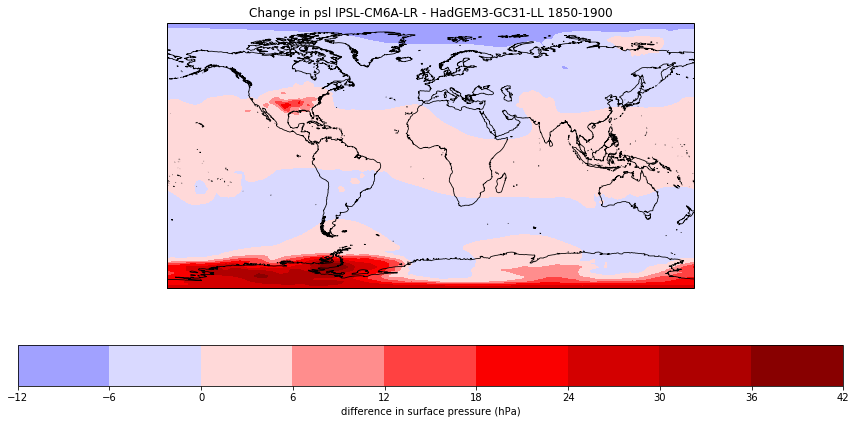

In [92]:
psl_seas = psl.sel(time = np.isin(psl['time.season'], "JJA"))

styr, endyr = int(psl_seas['time.year'].min()), int(psl_seas['time.year'].max())
samp = 50 # years to sample over for climatology

IPSL_samp = IPSL.sel(time = np.isin(IPSL['time.year'], np.arange(1850,1900))).mean(axis=0)
Had_samp = Had.sel(time = np.isin(Had['time.year'], np.arange(1850,1900))).mean(axis=0)
#endyr-samp,endyr
mdl = "IPSL-CM6A-LR"#"HadGEM3-GC31-LL"#
ens = "r1i1p1f1"#"r1i1p1f3"#"
var = "psl"
savefig = f"/rds/general/user/cmt3718/home/plots/climatologies/{var}_{mdl}_{ens}.png"
title = f"Change in {var} IPSL-CM6A-LR - HadGEM3-GC31-LL 1850-1900"
clim = (IPSL_samp - Had_samp)/100
plot_climatology(clim, title, savefig)
clim_samp = clim.sel(lat = np.arange(30,78,2), lon = np.arange(170-180,222-180,2))




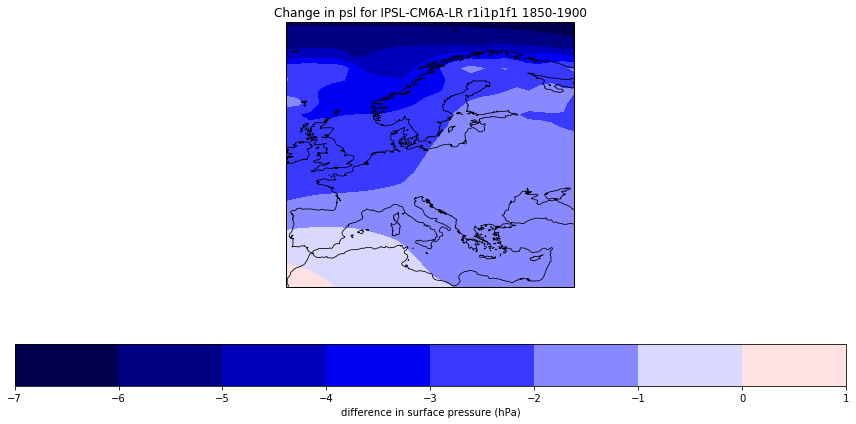

In [94]:
savefig = f"/rds/general/user/cmt3718/home/plots/climatologies/{var}_{mdl}_{ens}_EUR.png"
title = f"Change in {var} for {mdl} {ens} 1850-1900"
plot_climatology(clim_samp, title, savefig)

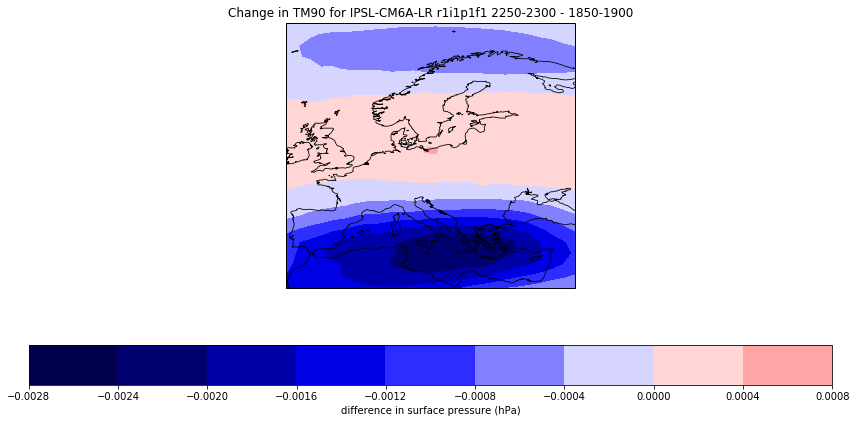

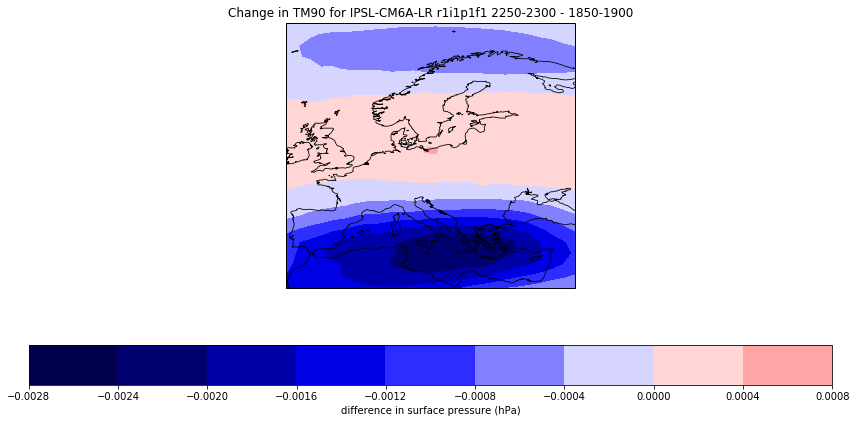

In [75]:
psl_seas = psl.sel(time = np.isin(psl['time.season'], "JJA"))

styr, endyr = int(psl_seas['time.year'].min()), int(psl_seas['time.year'].max())
samp = 50 # years to sample over for climatology

psl_pst = psl_seas.sel(time = np.isin(psl_seas['time.year'], np.arange(styr,styr+samp+1))).mean(axis=0)
psl_fut = psl_seas.sel(time = np.isin(psl_seas['time.year'], np.arange(2050,2100+1))).mean(axis=0)
#endyr-samp,endyr
mdl = "IPSL-CM6A-LR"#"HadGEM3-GC31-LL"#
ens = "r1i1p1f1"#"r1i1p1f3"#"
var = "TM90"
savefig = f"/rds/general/user/cmt3718/home/plots/climatologies/{var}_{mdl}_{ens}.png"
title = f"Change in {var} for {mdl} {ens} 2250-2300 - 1850-1900"
clim = (psl_fut - psl_pst)/100
plot_climatology(clim, title, savefig)
clim_samp = clim.sel(lat = np.arange(30,78,2), lon = np.arange(170-180,222-180,2))


savefig = f"/rds/general/user/cmt3718/home/plots/climatologies/{var}_{mdl}_{ens}_EUR.png"
title = f"Change in {var} for {mdl} {ens} 2250-2300 - 1850-1900"
plot_climatology(clim_samp, title, savefig)

In [62]:
clim['lon']

<xarray.DataArray 'lon' (lon: 180)>
array([-180., -178., -176., -174., -172., -170., -168., -166., -164., -162.,
       -160., -158., -156., -154., -152., -150., -148., -146., -144., -142.,
       -140., -138., -136., -134., -132., -130., -128., -126., -124., -122.,
       -120., -118., -116., -114., -112., -110., -108., -106., -104., -102.,
       -100.,  -98.,  -96.,  -94.,  -92.,  -90.,  -88.,  -86.,  -84.,  -82.,
        -80.,  -78.,  -76.,  -74.,  -72.,  -70.,  -68.,  -66.,  -64.,  -62.,
        -60.,  -58.,  -56.,  -54.,  -52.,  -50.,  -48.,  -46.,  -44.,  -42.,
        -40.,  -38.,  -36.,  -34.,  -32.,  -30.,  -28.,  -26.,  -24.,  -22.,
        -20.,  -18.,  -16.,  -14.,  -12.,  -10.,   -8.,   -6.,   -4.,   -2.,
          0.,    2.,    4.,    6.,    8.,   10.,   12.,   14.,   16.,   18.,
         20.,   22.,   24.,   26.,   28.,   30.,   32.,   34.,   36.,   38.,
         40.,   42.,   44.,   46.,   48.,   50.,   52.,   54.,   56.,   58.,
         60.,   62.,   64.,   66.,   68.

In [2]:
#xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip5/TM90_2D/block_data/TM90_clusters_r1i1p1_EURATL_EUR_ssp585_JJAextd_1950-2100.nc")

#qsub -v SCRIPT=/rds/general/user/cmt3718/home/notebooks/Calculate_TM90_era5_JJA.py ipython_qsub.sh


clusters_fin=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/overlap_persis/"
                "TM90_clusters_fin_BCC-CSM2-MR_r1i1p1f1_EUR_ssp585_JJAextd_1950-2100.nc")['TM90_clusters']

clusters_persis=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/overlap_persis/"
                "TM90_clusters_persis_BCC-CSM2-MR_r1i1p1f1_EUR_ssp585_JJAextd_1950-2100.nc")#['TM90_clusters']

clusters_orig=xr.open_dataset("/rds/general/user/cmt3718/home/data/cmip6/TM90_2D/block_data/"
                "TM90_clusters_BCC-CSM2-MR_r1i1p1f1_EUR_ssp585_JJAextd_1950-2100.nc")['TM90_clusters']

#cluster_persis identifies the cluster start date and the length of time it runs for
#from the 27th May to the 6th September
#for only JJA, select the JJA season from the clusters_fin period
#to identify occurrence per day, need to simply select the number of days within JJA that are blocked
#for persistence, max duration and event number, only select the events which are within JJA and satisfy the persistence criterea

#and for clusters_persis, select only the clusters which persist into JJA

#if the start date for a cluster is in May, then subtract x from cluster_persis where x is the number of days it occurred before the cluster started
#if the start date for a cluster is in late June or later, then subtract x from cluster_persis where x is the number of days that have occurred after 31st July
#then remove all clusters which persist for less then 5 days.
#clusters_persis_sel = clusters_persis.sel(cluster_persis>4)

In [3]:
time_xr=xr.DataArray(clusters_persis['time'], name = "clusters")
persis_xr=xr.DataArray(clusters_persis['cluster_persis'], name = "clusters")

In [ ]:
from datetime import datetime
for i, (time, cluster) in enumerate(zip(time_xr, persis_xr)):
    if i < 5:
        
        print(str(time.values), int(cluster.values))
        month, day = str(time.values)[5:7], str(time.values)[8:10]
        if month == 5:
            
            clus_len = int(clus_len.values)
            if day == 27 and clus_len < (5+4):
                print("AEHUHER")
        

1950-05-27 12:00:00 7
1950-05-28 12:00:00 6
1950-06-04 12:00:00 23
1950-06-05 12:00:00 22
1950-06-06 12:00:00 21
